In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import collections




In [2]:
# Importing filtered data

df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df.head(60)

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
0,101,40.0,W high,1,1,yes,yes,2,2,2,...,NaN,1,0,NaN,1.0,male,35.0,White,1,0
1,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,1,0,NaN,6.0,male,25.0,White,1,0
2,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,2,0,NaN,7.0,female,0.0,White,1,0
3,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,3,0,NaN,13.0,female,0.0,White,1,0
4,103,43.0,S high,1,1,yes,yes,2,2,8,...,NaN,1,0,NaN,2.0,male,32.0,White,1,0
5,104,47.0,S high,1,2,yes,yes,3,2,1,...,NaN,1,0,NaN,7.0,female,18.0,White,1,0
6,104,47.0,S high,1,2,yes,yes,3,2,1,...,NaN,2,0,NaN,9.0,male,18.0,White,1,0
7,105,55.0,W high,1,1,yes,yes,3,2,2,...,NaN,1,0,NaN,10.0,female,5.0,White,1,1
8,106,54.0,S high,1,1,yes,no,4,2,2,...,NaN,1,0,NaN,10.0,female,NaN,Mix,2,0
9,107,34.0,S high,2,3,yes,no,4,2,1,...,NaN,1,0,NaN,2.0,male,NaN,White,1,0


In [4]:
df_type = df.drop_duplicates(['unique_id','Child#','type'])
print(df_type.shape)
df_type_has_problem = df_type.loc[df_type['has_problem'] == 1]
df_type_has_no_problem = df_type.loc[df_type['has_problem'] == 0]

(4366, 242)


In [5]:
label_type = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'AD',
         'ASD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

for t in label_type:
    print(t, round(100 * df_type_has_problem.loc[df_type_has_problem['type'] == t].shape[0]/(df_type_has_problem.shape[0]),2))


PT/OT 14.2
Asthma 12.44
More medical 12.11
Special needs 8.5
ADHD 7.96
IEP 7.0
Limited ability 6.74
Chronic condition 5.66
Behavior 4.99
AD 3.85
ASD 3.85
Aggressive 3.02
Attention problem 3.06
PDD 2.39
AS 2.05
Heart 1.84
IFSP 0.34


In [6]:
df_children = df.drop_duplicates(['unique_id','Child#'])
print(df_children.shape)

## Childer who have at least one problem
print(round(100 * df_children.loc[df_children['has_problem'] == 1].shape[0]/(df_children.shape[0]),2))
print(round(100 * df_children.loc[df_children['has_problem'] == 0].shape[0]/(df_children.shape[0]),2))

(2806, 242)
29.47
70.53


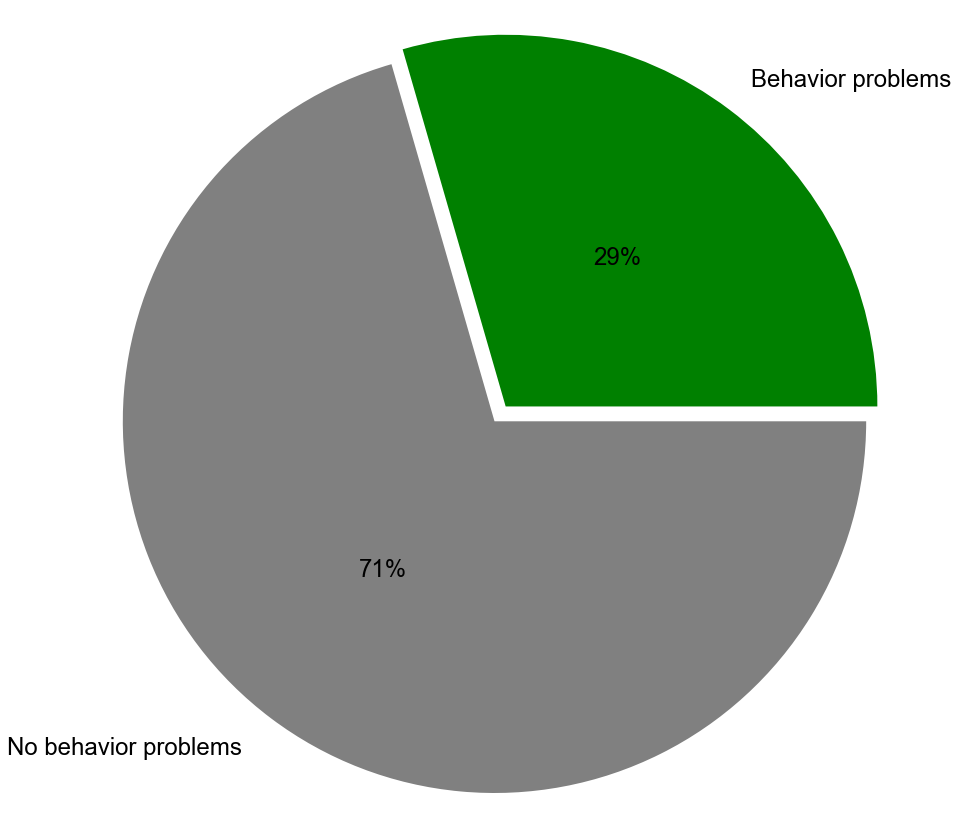

In [7]:
labels = ['Behavior problems', 
         'No behavior problems ']

fig, ax = plt.subplots(figsize=(15, 15))
# plt.figure(figsize=(15, 25))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size'] = 24

colors = ['green', 'grey']
percentages = [29.47, 70.53]
explode=(0.05, 0)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(2. * i / len(percentages))
#                              for i in range(len(percentages))])



ax.pie(percentages, explode=explode, labels=labels,  
        colors=colors,autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

# ax.set_title("Percentage of Chilhood Behavior Problems")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("has_problems_pie.png")

In [8]:
## Female and male children
print(df_children.shape)
print('male', round(100 * df_children.loc[df_children['sex'] == 'male'].shape[0]/(df_children.shape[0]),2))
print('female', round(100 * df_children.loc[df_children['sex'] == 'female'].shape[0]/(df_children.shape[0]),2))

(2806, 242)
male 52.57
female 47.33


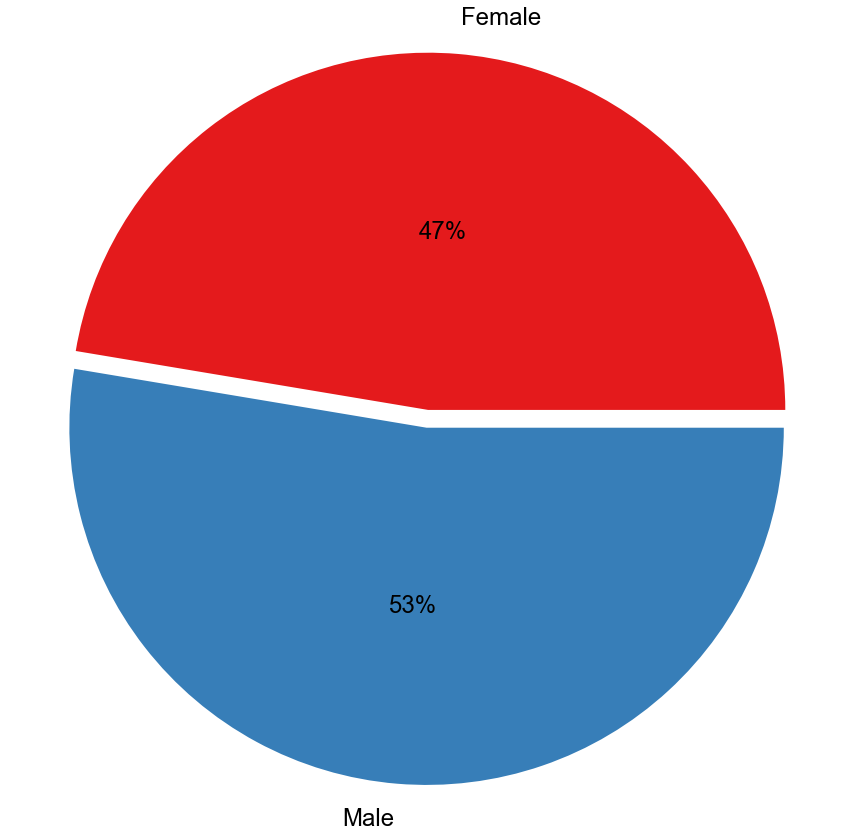

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.rcParams['font.size'] = 24
labels = ['Female' ,'Male']

percentages = [47.31, 52.58]
explode=(0.05, 0)

theme = plt.get_cmap('Set1')
ax.set_prop_cycle("color", [theme(0.3 * i / len(percentages))
                             for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

# ax.set_title("Percentage of Chilhood Behavior Problems")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("male_female_pie.png")

In [10]:
df_children_has_problem = df_children.loc[df_children['has_problem'] == 1]
df_children_has_no_problem = df_children.loc[df_children['has_problem'] == 0]
print("Total number of families with kids who has at least one problem:",df_children_has_problem.shape[0])


print('male children has problems', round(100 * df_children_has_problem.loc[df_children_has_problem['sex'] == 'male'].shape[0]/(df_children_has_problem.shape[0]),2))
print('female children has problems', round(100 * df_children_has_problem.loc[df_children_has_problem['sex'] == 'female'].shape[0]/(df_children_has_problem.shape[0]),2))


print(round(100 * df_children_has_no_problem.loc[df_children_has_no_problem['sex'] == 'male'].shape[0]/(df_children_has_no_problem.shape[0]),2))
print(round(100 * df_children_has_no_problem.loc[df_children_has_no_problem['sex'] == 'female'].shape[0]/(df_children_has_no_problem.shape[0]),2))

Total number of families with kids who has at least one problem: 827
male children has problems 61.31
female children has problems 38.69
48.91
50.93


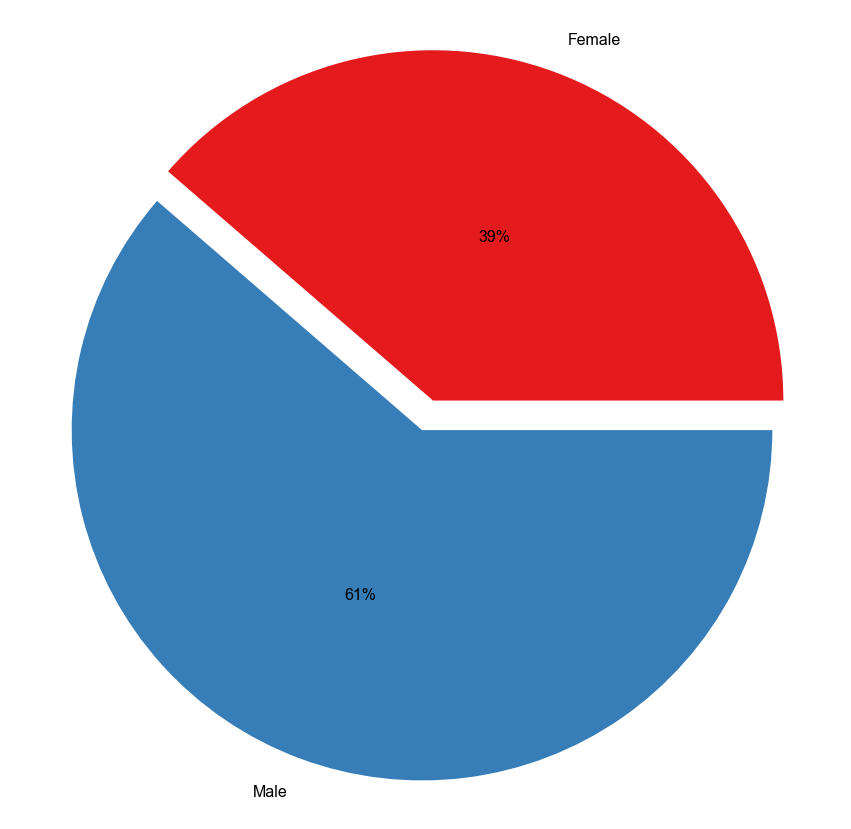

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams['font.size'] = 16
labels = ['Female' ,'Male']

percentages = [38.65, 61.35]
explode=(0.09, 0)

theme = plt.get_cmap('Set1')
ax.set_prop_cycle("color", [theme(0.3 * i / len(percentages))
                             for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

# ax.set_title("Percentage of Chilhood Behavior Problems")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("male_female_pie_has_problem.png")

In [12]:
## %male who have problems

29.19*61.35/100

17.908065

In [13]:
## %female who have problems

29.19*38.65/100

11.281935

In [14]:
## %male who have no problems

70.81*48.96/100

34.668576

In [15]:
## %male who have no problems

70.81*50.89/100

36.035209

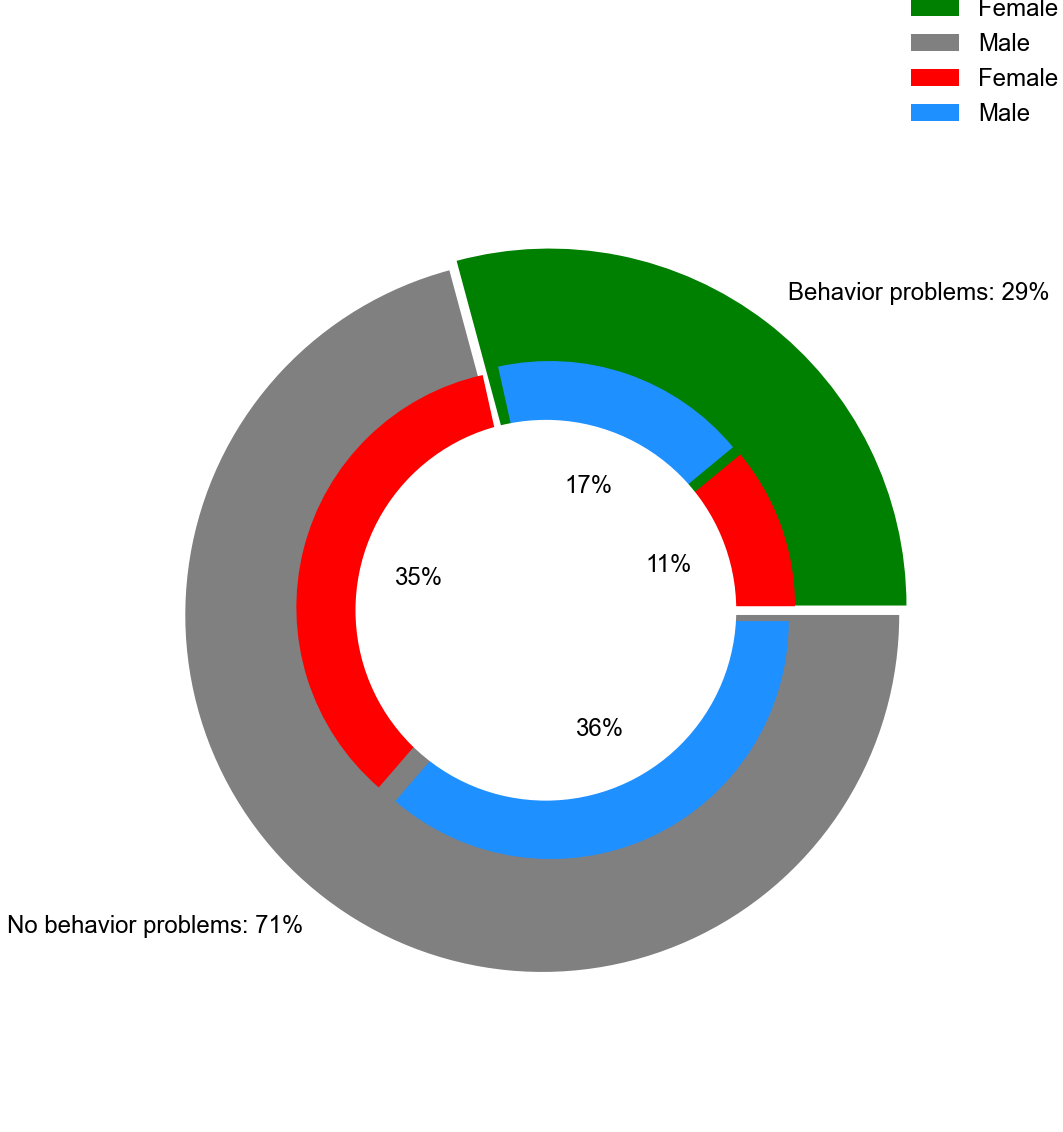

In [16]:
# Data to plot
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams['font.size'] = 24

labels = ['Behavior problems: 29%', 'No behavior problems: 71%']
sizes = [29.19, 70.81]
labels_gender = ['17.43%' ,'36.61%', '31.13%' ,'34.67%']
sizes_gender = [11.28, 17.90, 36.04, 37.23]
colors = ['green', 'grey']
colors_gender = ['red','dodgerblue']
explode = (0.05,0.05) 
explode_gender = (0.1,0.1,0.1,0.1)
#Plot
ax.pie(sizes, labels = labels, colors=colors, startangle = 0,frame=True, explode=explode,radius=3, shadow=False,   
       pctdistance=0,labeldistance=1.1)
ax.pie(sizes_gender,  colors = colors_gender,startangle = 0, explode=explode_gender,radius=2, shadow=False,   
       autopct='%1.0f%%',pctdistance=0.5 )
#Draw circle
centre_circle = plt.Circle((0,0),1.6,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
fig.tight_layout()
fig.legend(['Female', 'Male', 'Female', 'Male'], frameon=False, bbox_to_anchor=(1, 1.07)) 

plt.savefig("cool_pie.png")
plt.show()


In [17]:
# Grouping data by gender and child number to identify the number of problems for boys and girls

refined_df = df_type_has_problem[['unique_id', 'Child#','sex', 'has_problem', 'type']]
refined_df = refined_df.sort_values(by=['unique_id'])
grouped_df = refined_df.groupby(by = ['unique_id','Child#','sex']).sum().reset_index()
print(grouped_df.shape)

(827, 4)


In [18]:
# Filtering date by gender
grouped_df_male = grouped_df.loc[grouped_df['sex'] == 'male']
grouped_df_female = grouped_df.loc[grouped_df['sex'] == 'female']

In [19]:
print('List of boys who have problems', list(grouped_df_male['has_problem'].value_counts())) 
print('List of girls who have problems', list(grouped_df_female['has_problem'].value_counts())) 


List of boys who have problems [211, 101, 30, 30, 28, 28, 25, 23, 17, 7, 5, 1, 1]
List of girls who have problems [173, 43, 31, 23, 16, 14, 7, 6, 5, 1, 1]


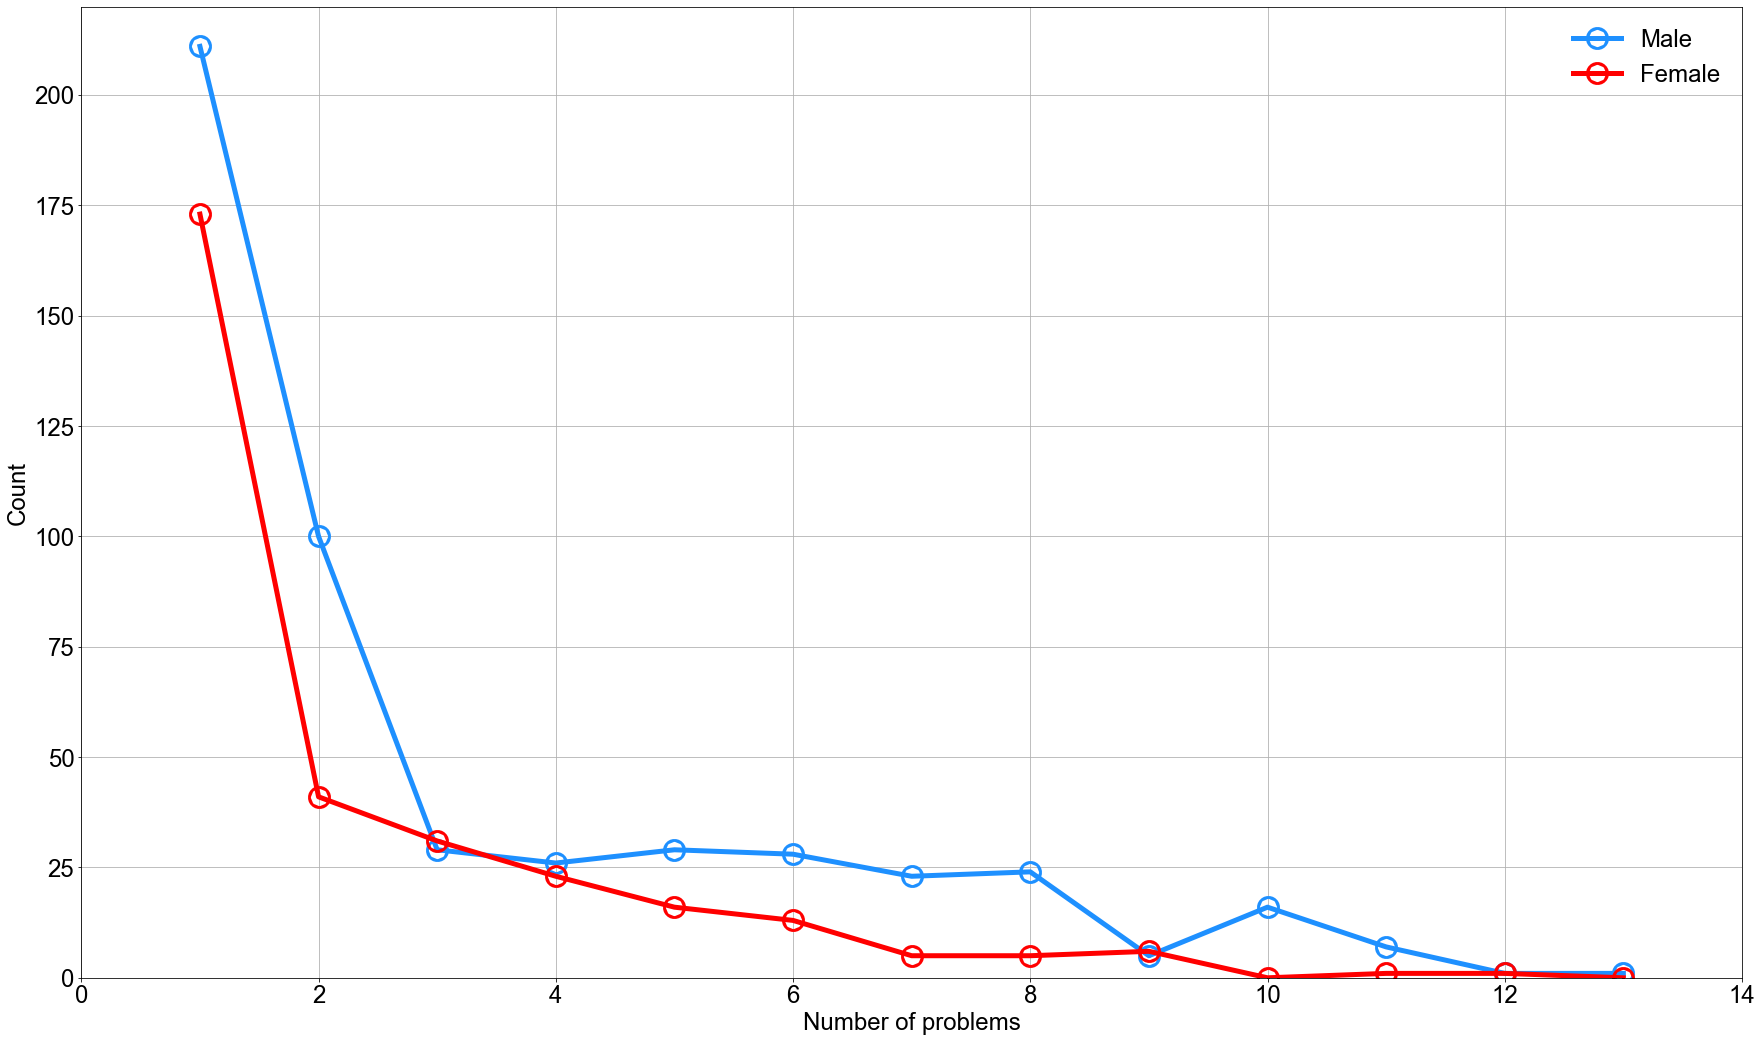

In [20]:
# Plot
plt.figure(figsize=(25, 15))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [211, 100, 29, 26, 29, 28, 23, 24, 5, 16, 7, 1, 1], '.-', c='dodgerblue', linewidth=5,mew=20, label = 'Male')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [173, 41, 31, 23, 16, 13, 5, 5, 6, 0, 1, 1, 0],'.-',c='red', linewidth=5,mew=20, label = 'Female')
plt.ylabel("Count",fontsize=24)
plt.xlabel("Number of problems",fontsize=24)
plt.legend(['Male', 'Female'], frameon=False)
plt.xlim(0, 14)
plt.ylim(0, 220)
plt.tight_layout()
plt.savefig("more_than_1problem_has_problem_gender.png")
plt.grid('on')
plt.show()

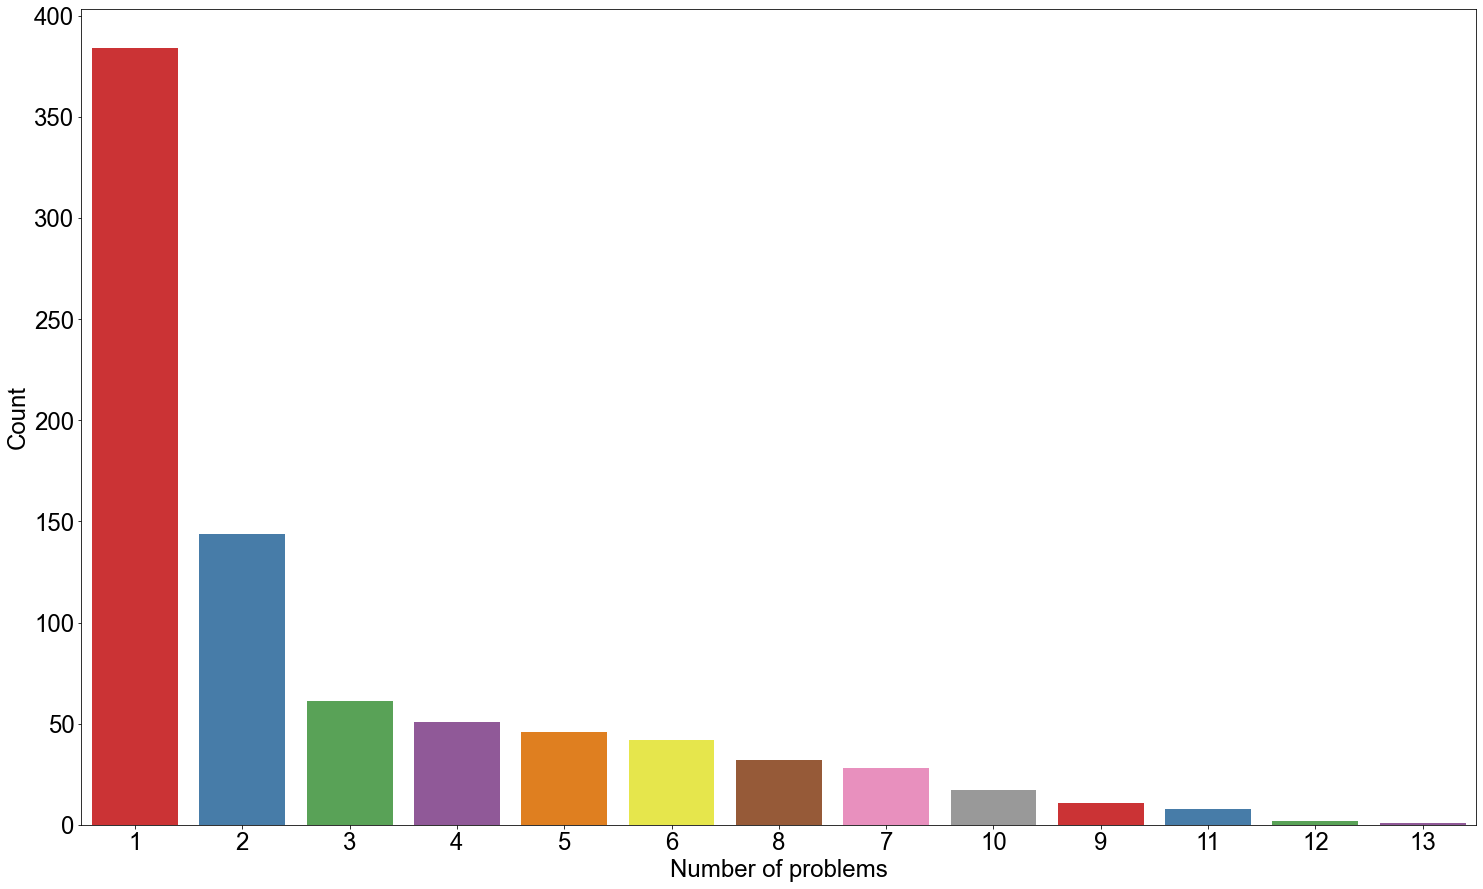

In [21]:
# Plotting grouped date to identify count per each number of childhood problems

labels = ['1', '2', '3', '4', '5', '6', '8', '7', '10', '9', '11', '12', '13'] 



plt.figure(figsize=(25, 15))

b = sb.countplot(x = "has_problem", data=grouped_df, palette="Set1", order = grouped_df['has_problem'].value_counts().index);
b.set_ylabel("Count",fontsize=24)
b.set_xlabel("Number of problems",fontsize=24)
b.set_xticklabels(labels)
b.tick_params(labelsize=24)

plt.savefig("more_than_1problem_count_has_problem.png")

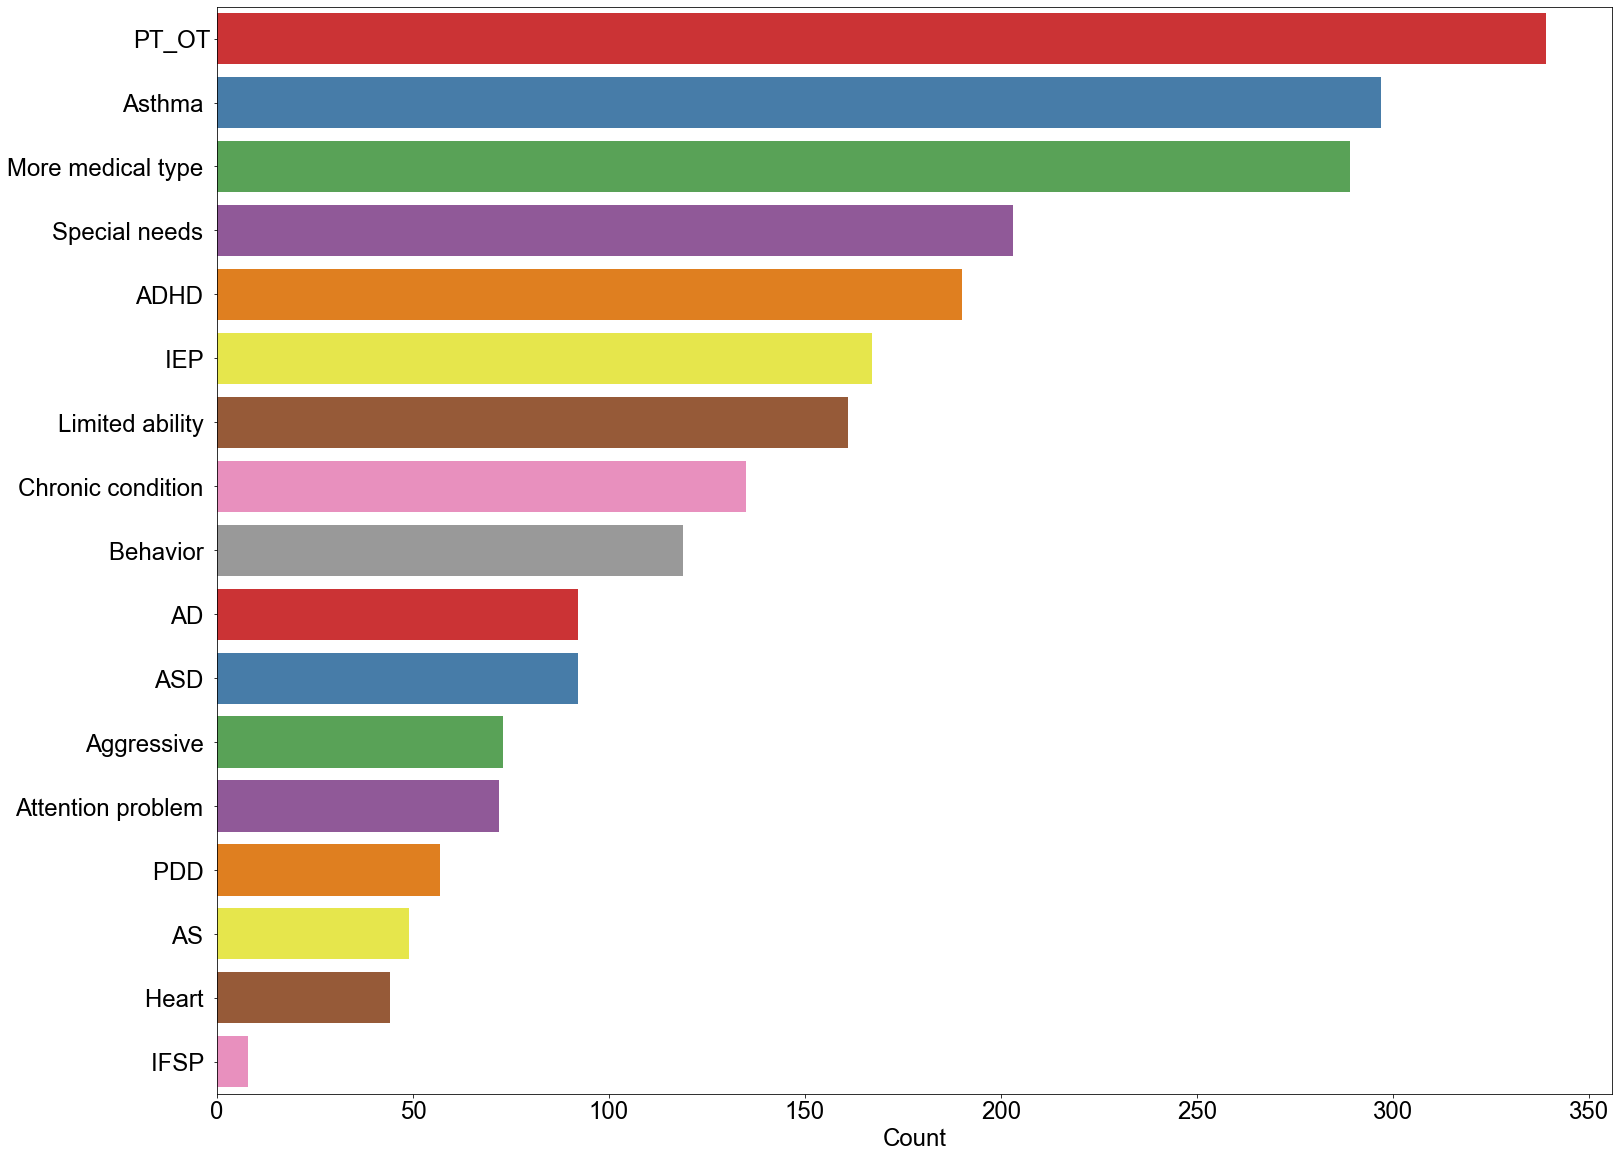

In [22]:
# Count per each problem type

labels = ['PT_OT', 
         'Asthma ',
         'More medical type ',
         'Special needs ',
         'ADHD ',          
         'IEP ',

         'Limited ability ',
         'Chronic condition ',
         'Behavior ',
         'AD ',
         'ASD ',
         'Aggressive ',          
         'Attention problem ',

         'PDD ',
         'AS ',
         'Heart ',
         'IFSP ']

plt.figure(figsize=(25, 20))

b = sb.countplot(y = "type", data=df_type_has_problem, palette="Set1", order = df_type_has_problem['type'].value_counts().index);
b.set_xlabel("Count",fontsize=24)
b.set_ylabel("",fontsize=24)
b.set_yticklabels(labels)
b.tick_params(labelsize=24)
plt.savefig("output.png")

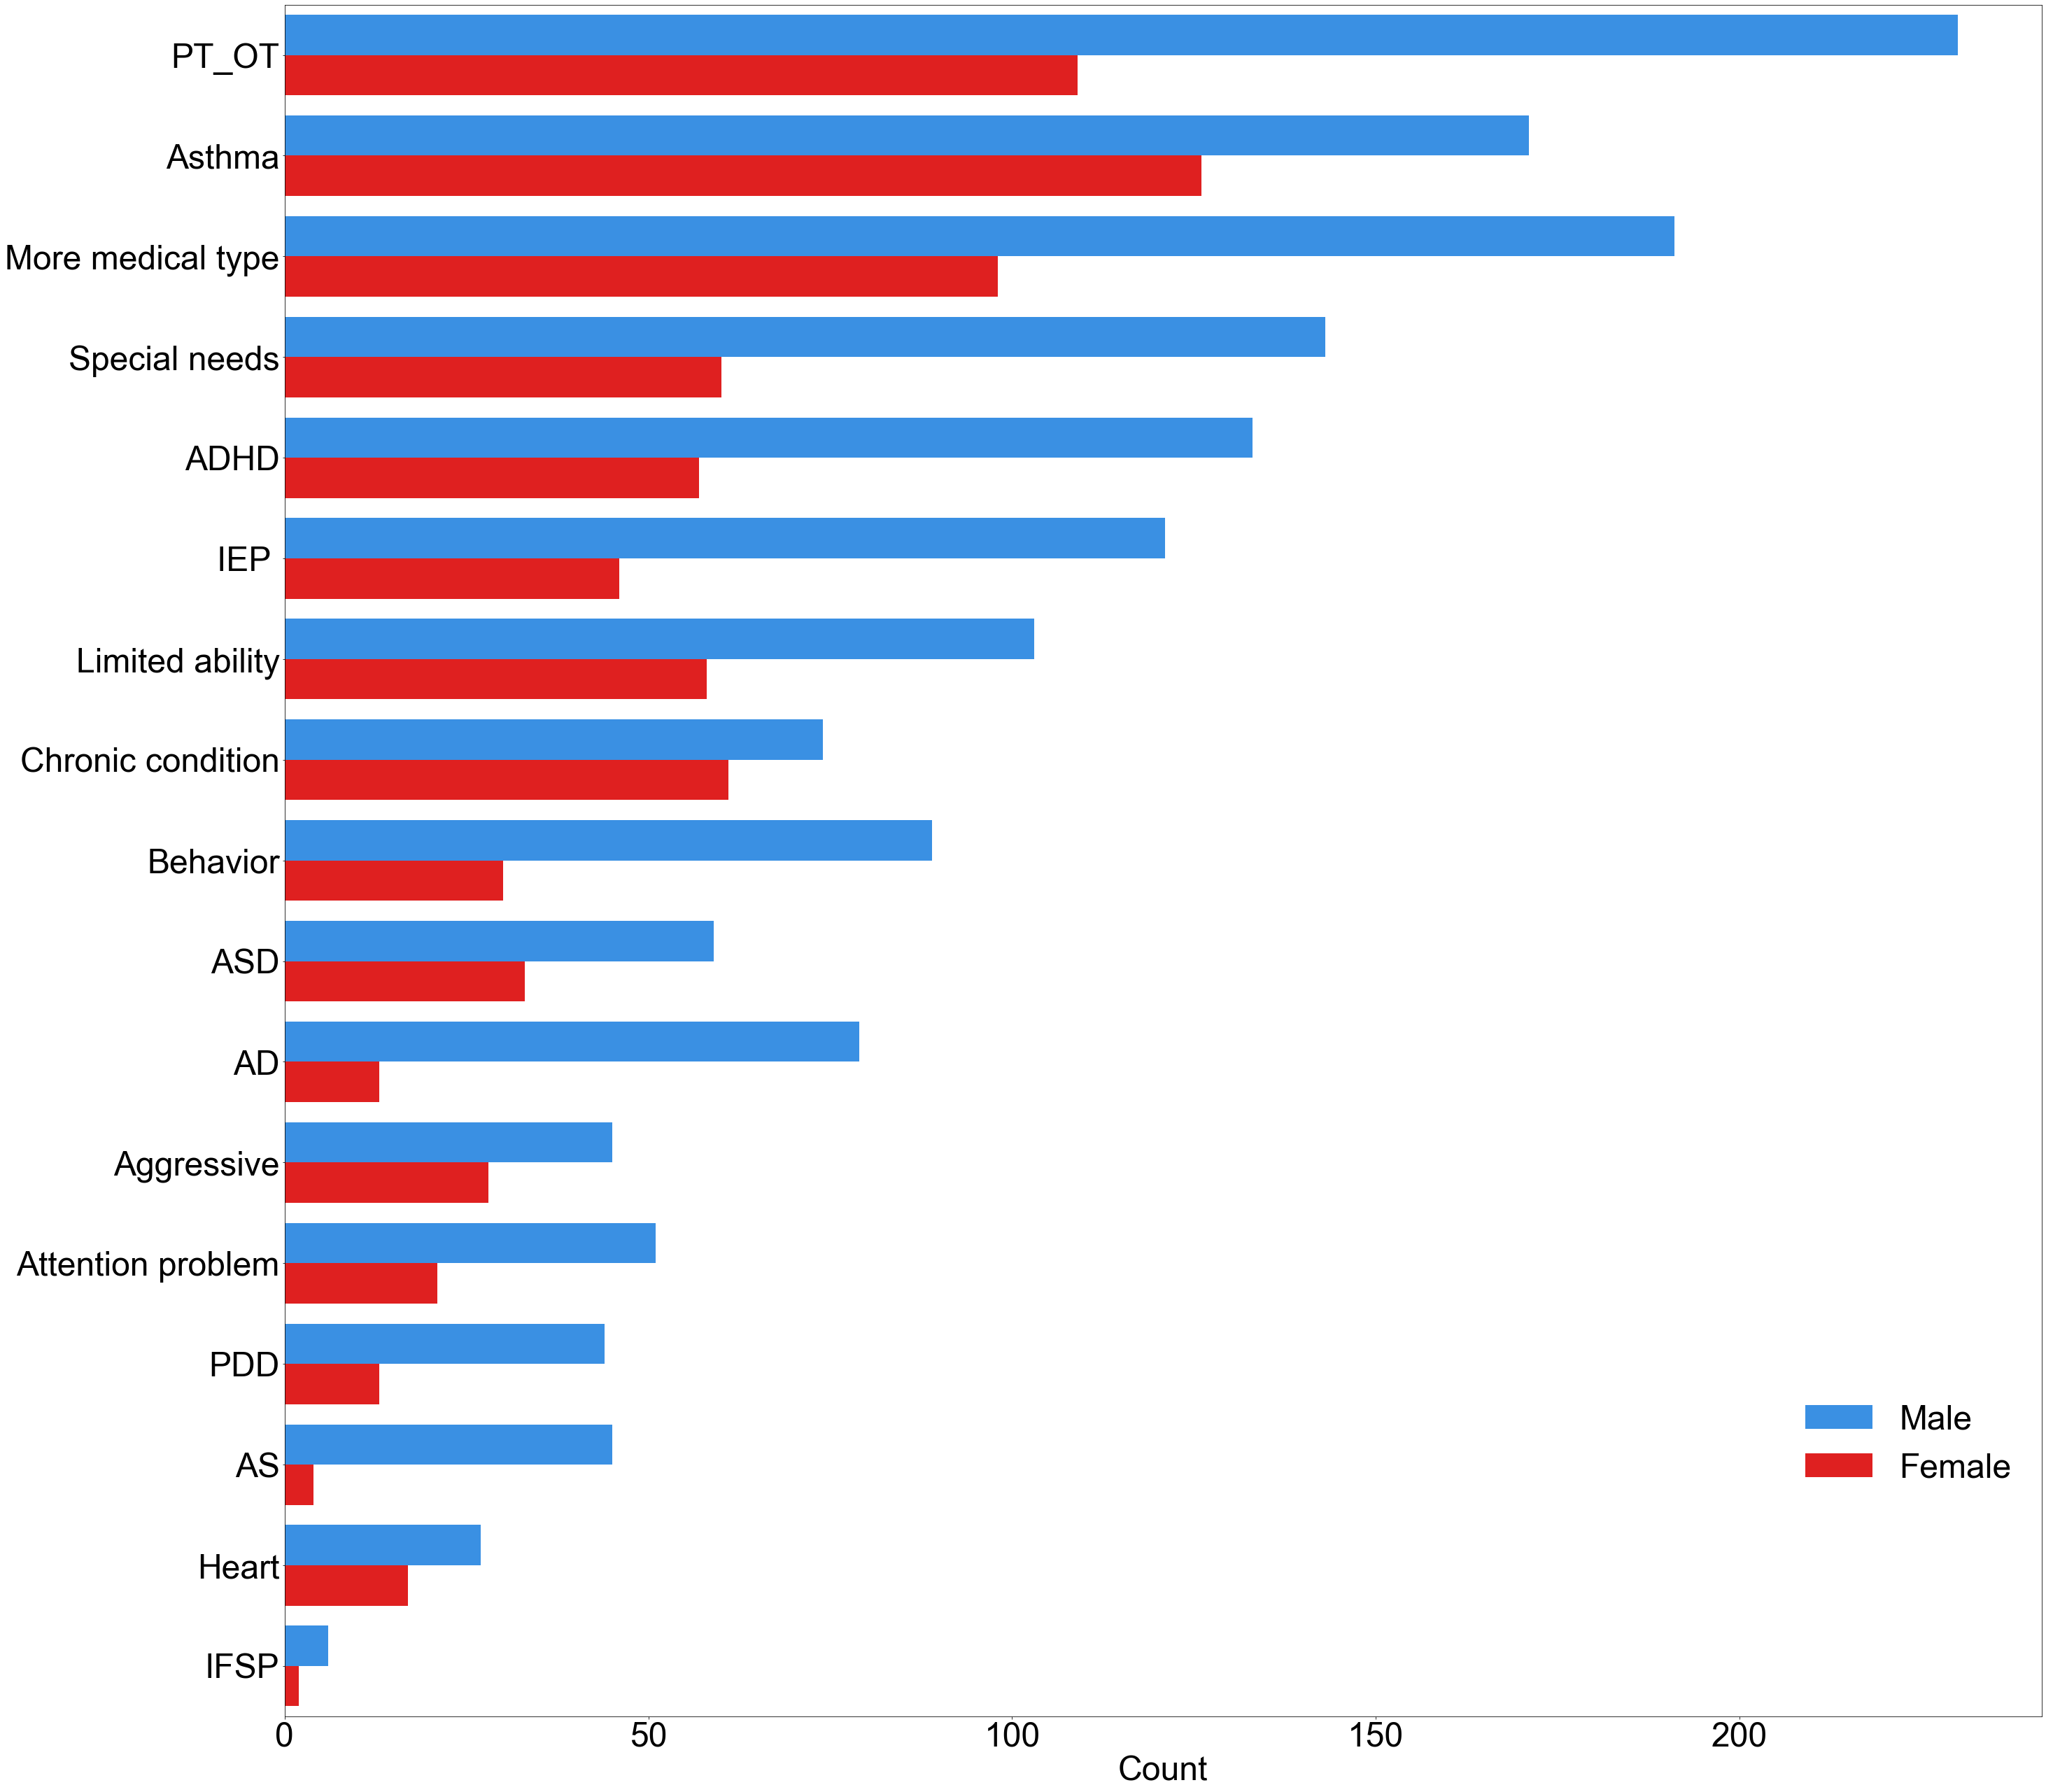

In [23]:
# Bar plot for gender per each problem type
labels = ['PT_OT', 
         'Asthma',
         'More medical type',
         'Special needs',
         'ADHD',          
         'IEP ',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

color_palette_list = ['dodgerblue', 'red']
# color_palette_list = sb.cubehelix_palette(as_cmap=True)

plt.figure(figsize=(45, 45))
b = sb.countplot(y = "type",hue = "sex", data=df_type_has_problem, palette=color_palette_list, order = df_type_has_problem['type'].value_counts().index);
b.set_xlabel("Count",fontsize=48)
b.set_ylabel("",fontsize=48)
b.set_yticklabels(labels)
b.tick_params(labelsize=48)
b.legend(['Male', 'Female'], frameon=False, bbox_to_anchor=(1, 0.2), fontsize = 48)
plt.savefig("male_female_type.png")

In [24]:
# Ratio of gender per each problem type
for t in label_type:
    temp_df_type = df_type_has_problem.loc[df_type_has_problem['type'] == t]

    temp_df_male = temp_df_type.loc[temp_df_type['sex'] == 'male']
    temp_df_female = temp_df_type.loc[temp_df_type['sex'] == 'female']
    print(t, round(temp_df_female.shape[0]/temp_df_male.shape[0], 2));

PT/OT 0.47
Asthma 0.74
More medical 0.51
Special needs 0.42
ADHD 0.43
IEP 0.38
Limited ability 0.56
Chronic condition 0.82
Behavior 0.34
AD 0.56
ASD 0.16
Aggressive 0.41
Attention problem 0.62
PDD 0.3
AS 0.09
Heart 0.63
IFSP 0.33


In [25]:
# Filtering data for number of problems

more_than_one = grouped_df.loc[grouped_df['has_problem'] > 1]
less_than_one = grouped_df.loc[grouped_df['has_problem'] <= 1]



In [26]:
# Data for more than one problem 

more_than_one_filtered = pd.DataFrame()
for ids, num in zip(list(more_than_one['unique_id']), list(more_than_one['Child#'])):
    temp = df_type_has_problem[df_type_has_problem['unique_id'] == ids]
    temp = temp[temp['Child#'] == num]
    more_than_one_filtered = more_than_one_filtered.append(temp)
    

['More medical', 'PT/OT', 'Special needs', 'IEP', 'ADHD', 'Limited ability', 'Asthma', 'Behavior', 'Chronic condition', 'ASD', 'AD', 'Aggressive', 'PDD', 'Attention problem', 'AS', 'Heart', 'IFSP']
[13.63, 13.63, 9.79, 8.34, 7.59, 7.39, 6.84, 5.74, 5.64, 4.54, 4.34, 3.39, 2.8, 2.35, 2.3, 1.3, 0.4]
2003


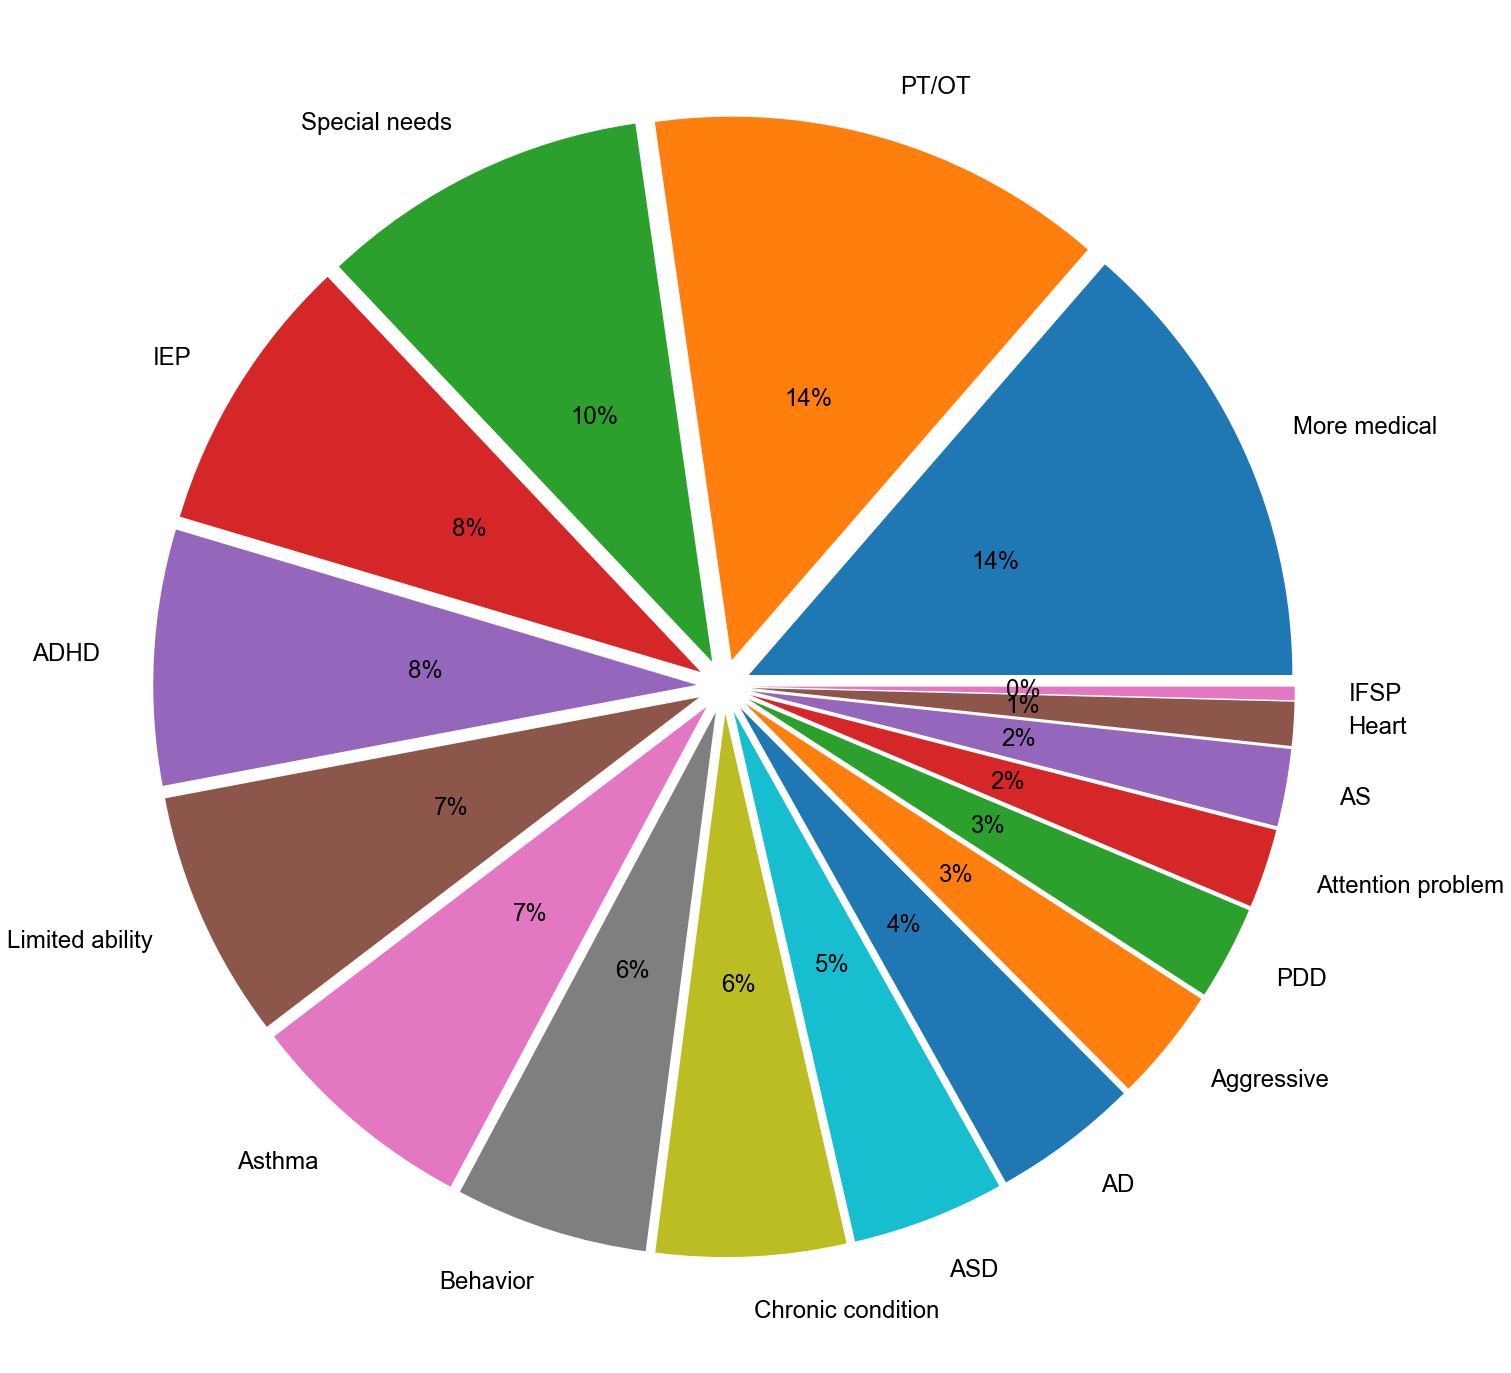

In [27]:
# Pie chart for more than one problem

types = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * more_than_one_filtered.loc[more_than_one_filtered['type'] == t].shape[0]/(more_than_one_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print((more_than_one_filtered.shape[0]))
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

# ax.set_title("Most Common Problem ")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("more_than_one.png")

In [28]:
# Data for one problem 

less_than_one_filtered = pd.DataFrame()
for ids, num in zip(list(less_than_one['unique_id']), list(less_than_one['Child#'])):
    temp = df_type_has_problem[df_type_has_problem['unique_id'] == ids]
    temp = temp[temp['Child#'] == num]
    less_than_one_filtered = less_than_one_filtered.append(temp)

['Asthma', 'PT/OT', 'ADHD', 'Attention problem', 'Chronic condition', 'Heart', 'More medical', 'Limited ability', 'Special needs', 'AD', 'Aggressive', 'Behavior', 'AS', 'PDD', 'ASD']
[41.67, 17.19, 9.9, 6.77, 5.73, 4.69, 4.17, 3.39, 1.82, 1.3, 1.04, 1.04, 0.78, 0.26, 0.26]
2003


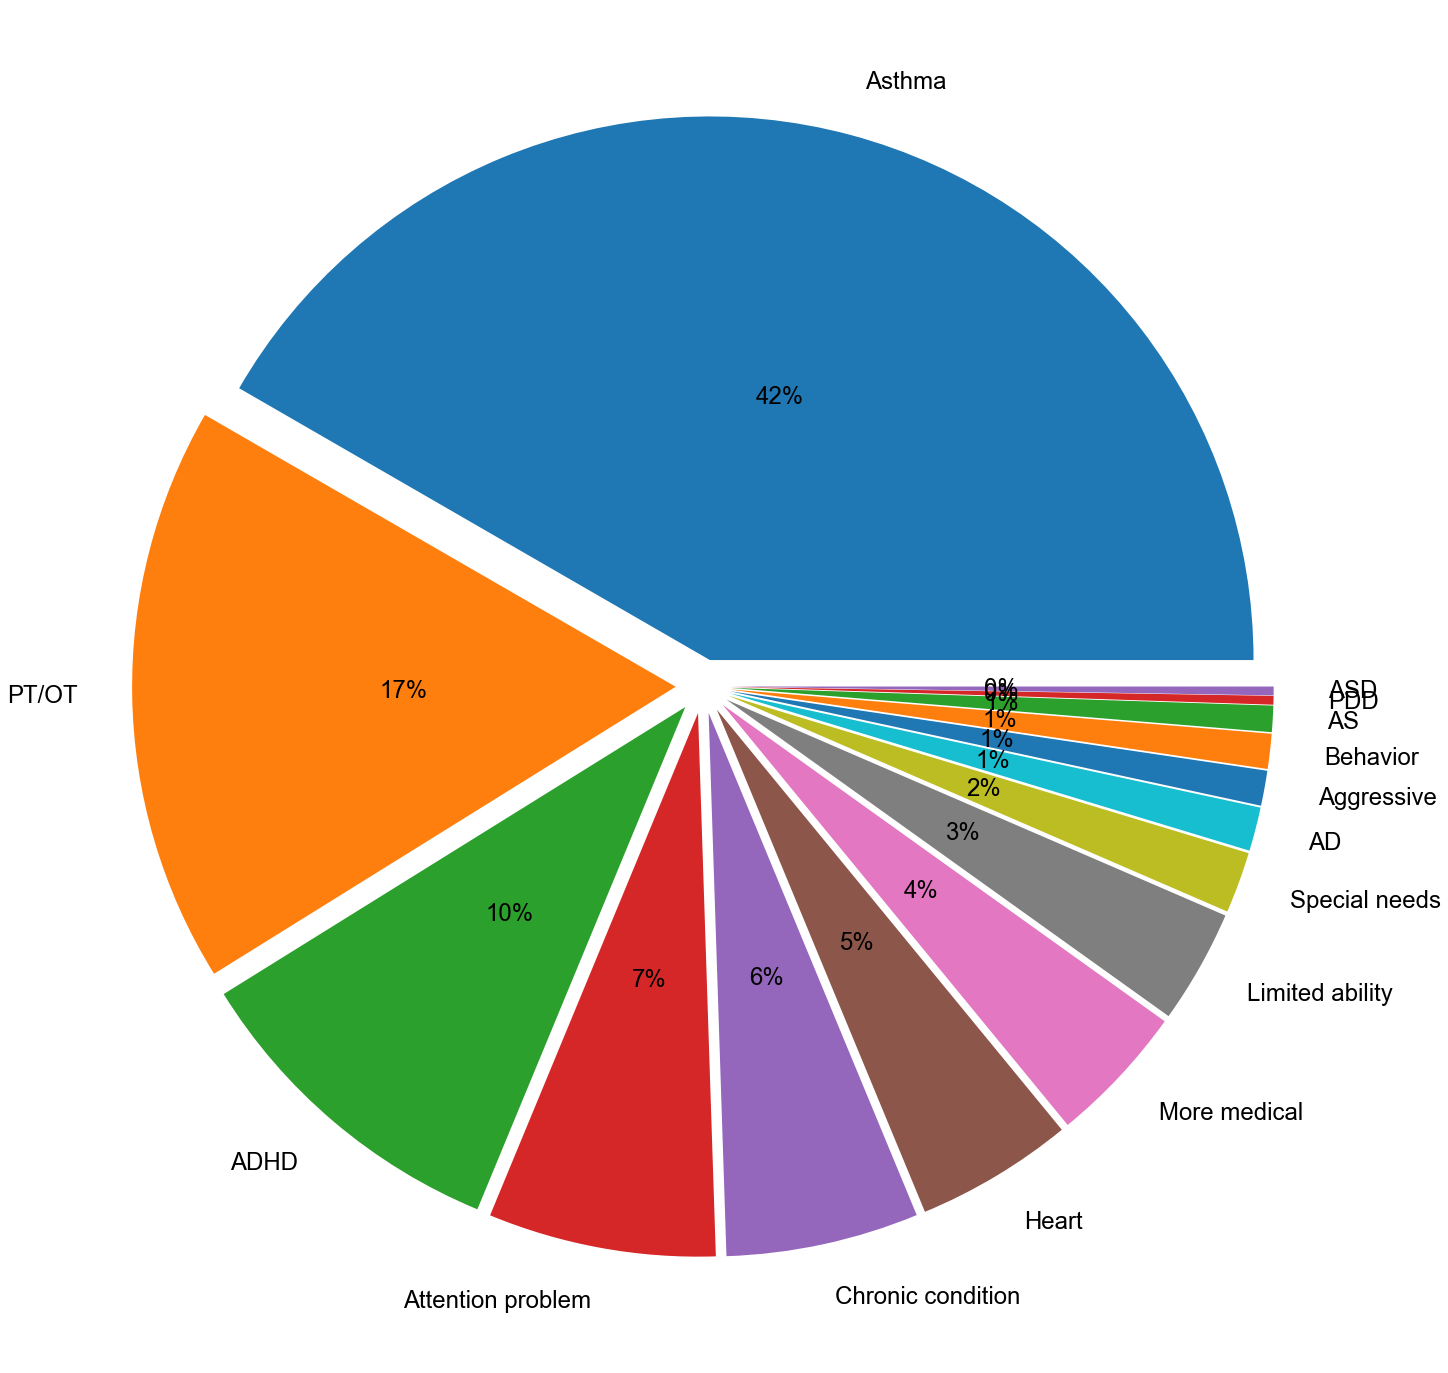

In [29]:
# Pie chart for one problem

types = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart']

types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * less_than_one_filtered.loc[less_than_one_filtered['type'] == t].shape[0]/(less_than_one_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print((more_than_one_filtered.shape[0]))
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

# ax.set_title("Most Common Problem ")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("less_than_one.png")

In [30]:
# get ids of those how has 3 top problems
PT_OT_type = more_than_one_filtered.loc[more_than_one_filtered['type'] == 'PT/OT']
other_type = more_than_one_filtered.loc[more_than_one_filtered['type'] != 'PT/OT']

In [31]:
# More than one problem data for PT/OT type 

PT_OT_type_filtered = pd.DataFrame()
for ids, age in zip(list(PT_OT_type['unique_id']), list(PT_OT_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    PT_OT_type_filtered = PT_OT_type_filtered.append(temp)
    

In [32]:
types = [ 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

In [33]:
types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * PT_OT_type_filtered.loc[PT_OT_type_filtered['type'] == t].shape[0]/(PT_OT_type_filtered.shape[0]),4))
    
    print(t, round(100 * PT_OT_type_filtered.loc[PT_OT_type_filtered['type'] == t].shape[0]/(PT_OT_type_filtered.shape[0]),4))
sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)
print(PT_OT_type.shape[0])

Asthma 4.2755
More medical 16.0728
Special needs 13.1433
ADHD 7.7593
IEP 11.639
Limited ability 9.5804
Chronic condition 4.5922
Behavior 7.2842
ASD 6.2549
AD 5.0673
Aggressive 3.9588
Attention problem 2.2961
PDD 4.038
AS 2.692
Heart 0.7918
IFSP 0.5542
273


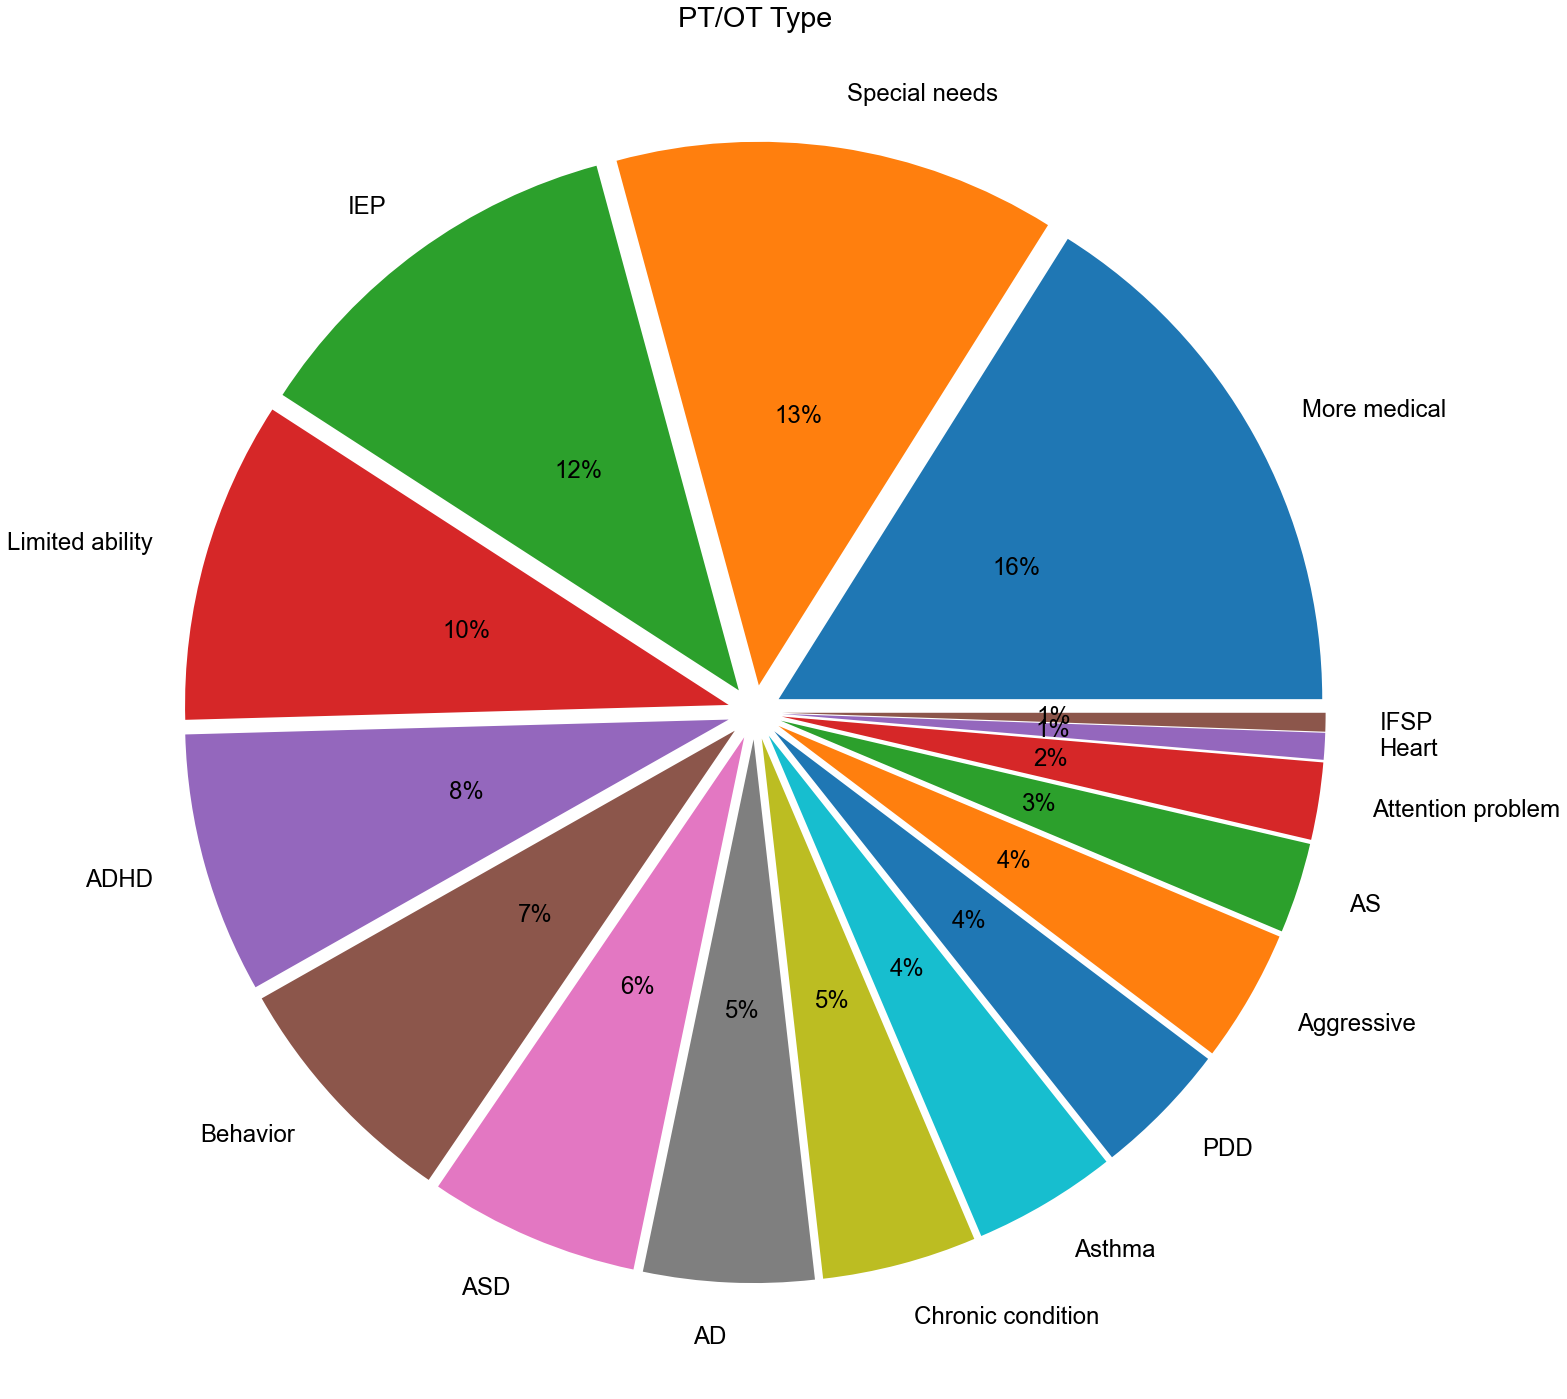

In [34]:
# Pie chart for PT/OT
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)


ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal')

ax.set_title("PT/OT Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("PT_OT_type.png")

In [35]:
# More than one problem data for More medical type  

More_medical_type = more_than_one_filtered.loc[more_than_one_filtered['type'] == 'More medical']
other_type = more_than_one_filtered.loc[more_than_one_filtered['type'] != 'More medical']
More_medical_type_filtered = pd.DataFrame() 

for ids, age in zip(list(More_medical_type['unique_id']), list(More_medical_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    More_medical_type_filtered = More_medical_type_filtered.append(temp)
    
More_medical_type_filtered

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
26,116,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,1,1,PDD,7.0,male,9.0,White,1,0
3042,116,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,1,1,Behavior,7.0,male,9.0,White,1,0
3315,116,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,1,1,Special needs,7.0,male,9.0,White,1,0
3776,116,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,1,1,Limited ability,7.0,male,9.0,White,1,0
3921,116,NaN,NaN,2,2,yes,yes,3,1,1,...,NaN,1,1,PT/OT,7.0,male,9.0,White,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,1675,50.0,Autistic child,1,2,yes,no,4,2,1,...,NaN,1,1,Behavior,10.0,male,NaN,White,1,0
3453,1675,50.0,Autistic child,1,2,yes,no,4,2,1,...,NaN,1,1,Special needs,10.0,male,NaN,White,1,0
3905,1675,50.0,Autistic child,1,2,yes,no,4,2,1,...,NaN,1,1,Limited ability,10.0,male,NaN,White,1,0
4141,1675,50.0,Autistic child,1,2,yes,no,4,2,1,...,NaN,1,1,PT/OT,10.0,male,NaN,White,1,0


['PT/OT', 'Special needs', 'IEP', 'Limited ability', 'ADHD', 'Behavior', 'Chronic condition', 'ASD', 'Asthma', 'AD', 'Aggressive', 'PDD', 'AS', 'Attention problem', 'Heart', 'IFSP']
[16.32, 12.62, 10.45, 9.57, 8.2, 6.43, 6.19, 5.79, 5.31, 4.9, 3.78, 3.7, 2.89, 2.25, 0.96, 0.64]
273


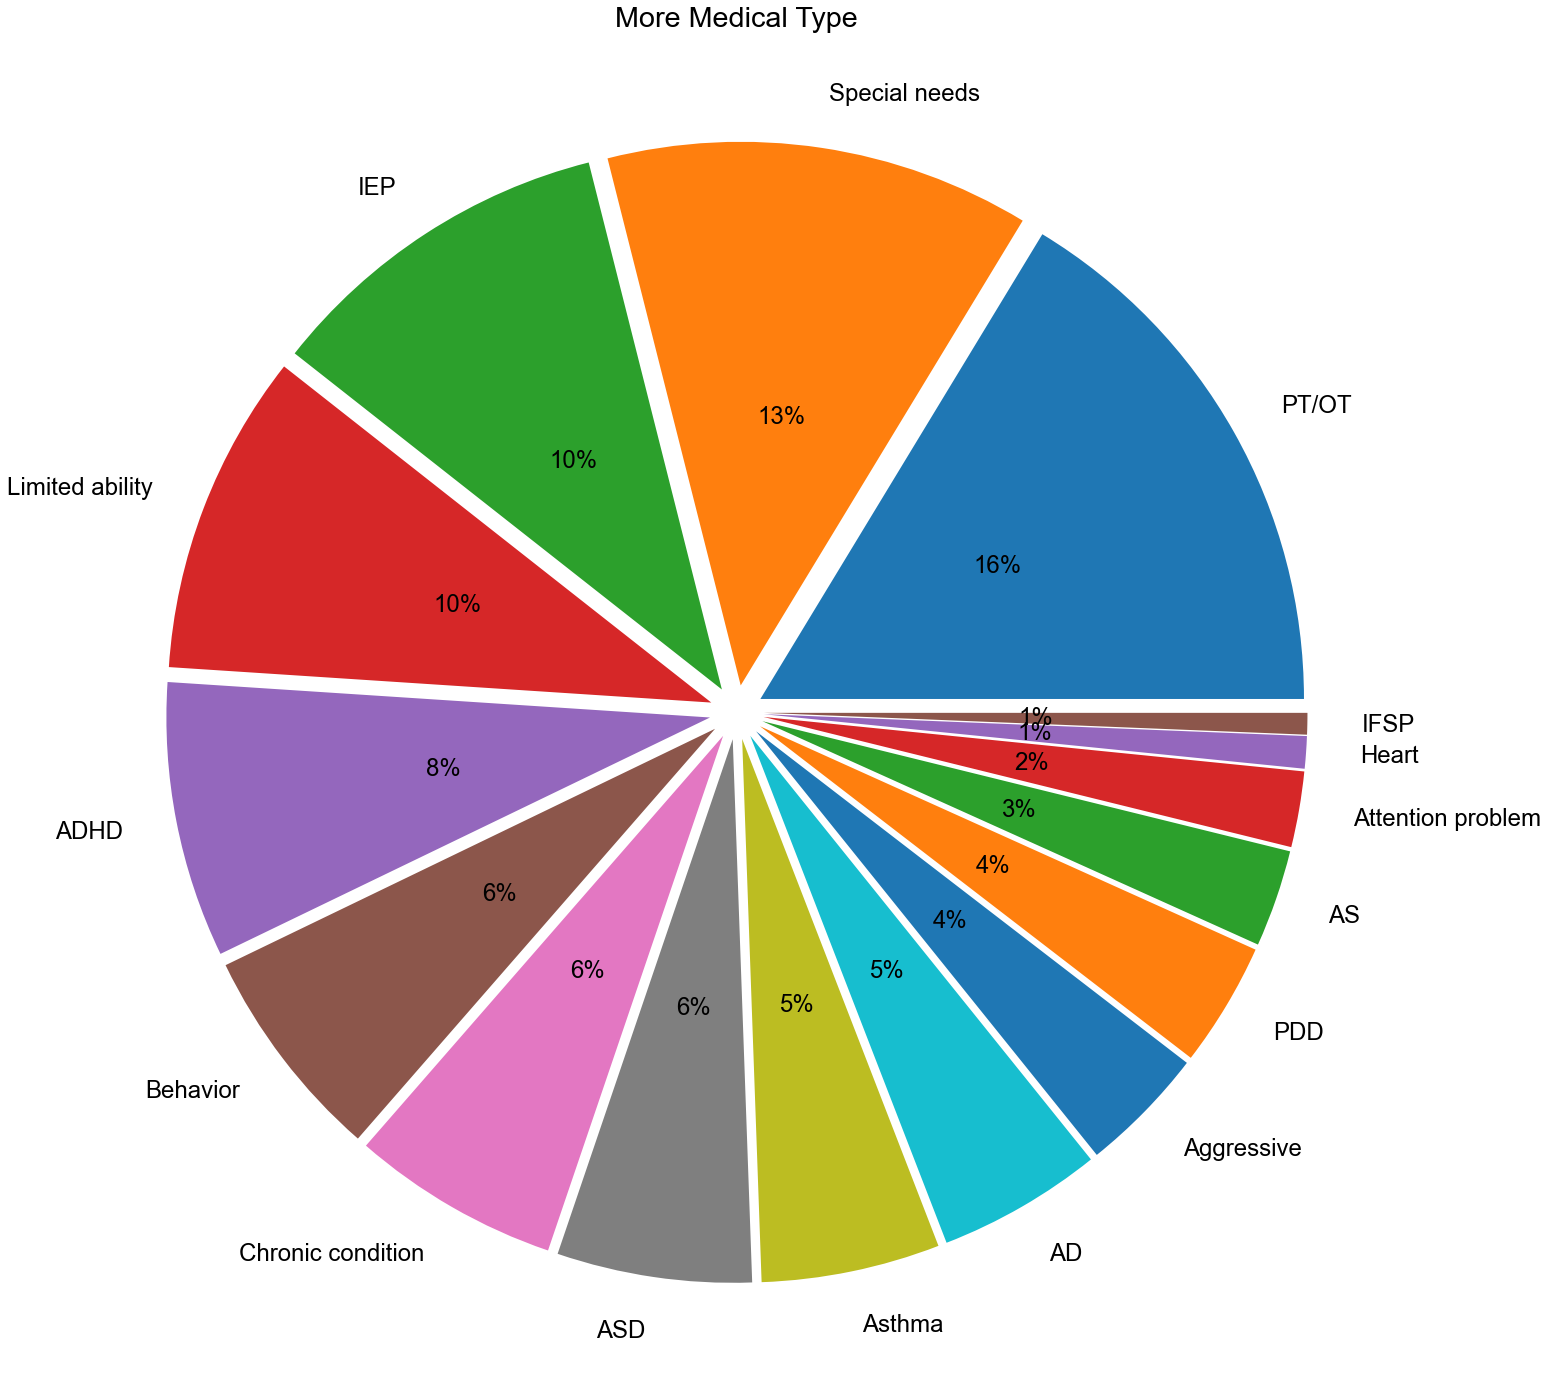

In [36]:
# Pie Chart

types = ['PT/OT', 
         'Asthma',
         
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']


types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * More_medical_type_filtered.loc[More_medical_type_filtered['type'] == t].shape[0]/(More_medical_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(More_medical_type.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("More Medical Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("More_medical_type.png")

In [37]:
# More than one problem data for Special needs type  

Special_needs_type = more_than_one_filtered.loc[more_than_one_filtered['type'] == 'Special needs']
other_type = more_than_one_filtered.loc[more_than_one_filtered['type'] != 'Special needs']
Special_needs_type_filtered = pd.DataFrame() 

for ids, age in zip(list(Special_needs_type['unique_id']), list(Special_needs_type['child_age'])):
    temp = other_type[other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    Special_needs_type_filtered = Special_needs_type_filtered.append(temp)
    


['PT/OT', 'IEP', 'More medical', 'Limited ability', 'ASD', 'ADHD', 'Behavior', 'Chronic condition', 'PDD', 'Asthma', 'Aggressive', 'AD', 'AS', 'Attention problem', 'IFSP', 'Heart']
[14.86, 14.23, 14.06, 10.21, 7.34, 6.54, 6.36, 4.83, 4.57, 3.85, 3.67, 3.4, 2.95, 1.7, 0.72, 0.72]
1117


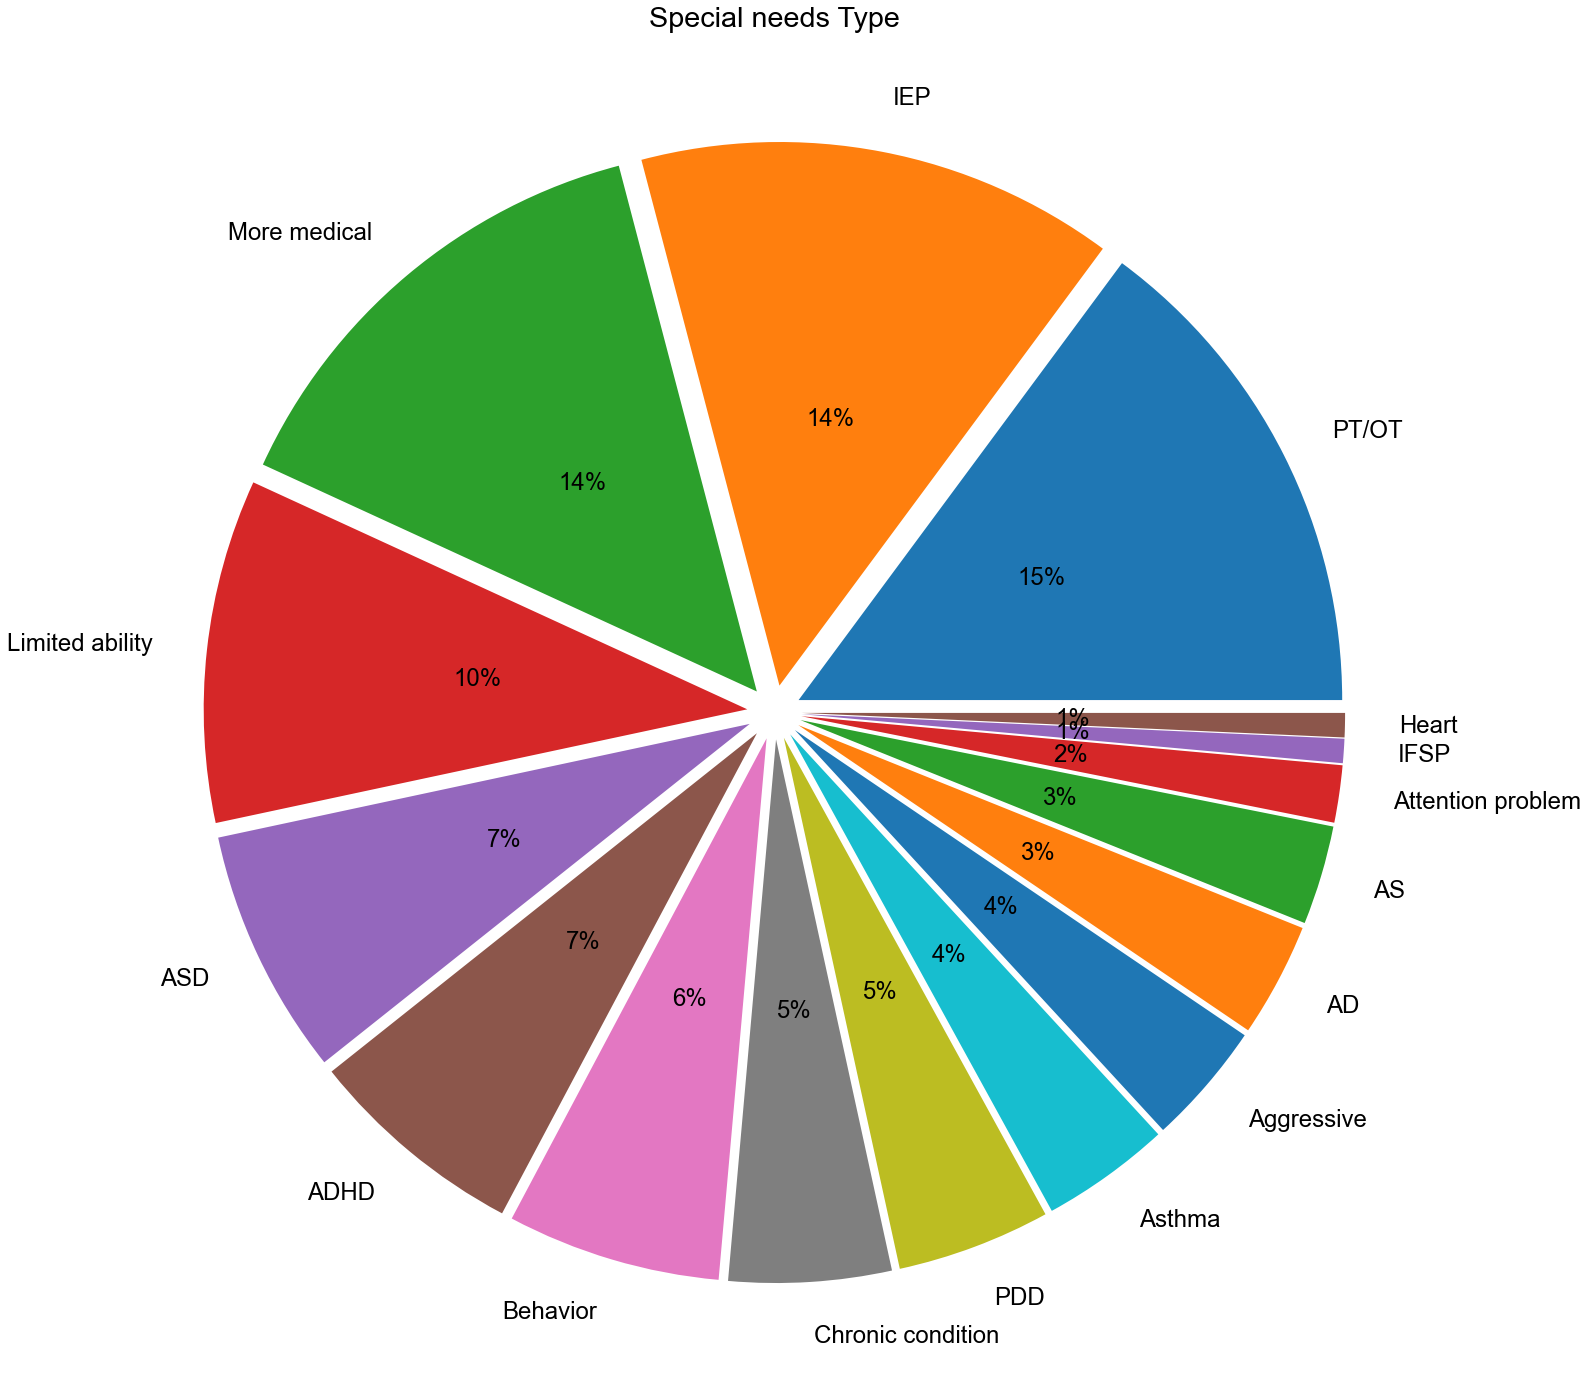

In [38]:
types = ['PT/OT', 
         'Asthma',
         'More medical',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']
types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * Special_needs_type_filtered.loc[Special_needs_type_filtered['type'] == t].shape[0]/(Special_needs_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)
print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(Special_needs_type_filtered.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("Special needs Type")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("Special_needs_type.png")